In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [2]:

import subprocess

def get_gpu_memory():
    """Returns the total memory of the GPU in MB"""
    try:
        result = subprocess.check_output(
            ["nvidia-smi", "--query-gpu=memory.total", "--format=csv,nounits,noheader"], 
            encoding='utf-8')
        return int(result.strip())
    except Exception as e:
        print("Error al obtener la información de la memoria de la GPU:", e)
        return None

# Obtener la cantidad de memoria VRAM disponible en la GPU
total_memory_mb = get_gpu_memory()
if total_memory_mb is not None:
    total_memory_gb = total_memory_mb / 1024
    print("Cantidad total de memoria VRAM en la GPU:", total_memory_gb, "GB")
    
    # Configurar TensorFlow para limitar el uso de memoria GPU
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            # Limitar la memoria GPU al máximo disponible
            tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("No se pudo obtener la información de la memoria de la GPU.")



Cantidad total de memoria VRAM en la GPU: 6.0 GB


In [3]:
# Definir la ruta de la carpeta que contiene las imágenes PNG
ruta_carpeta = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\imagenesMak1'

# Obtener la lista de nombres de archivos de imágenes
archivos_imagenes = os.listdir(ruta_carpeta)

# Cargar las imágenes y convertirlas en matrices numpy
imagenes = []
for archivo in archivos_imagenes:
    ruta_imagen = os.path.join(ruta_carpeta, archivo)
    imagen = load_img(ruta_imagen, color_mode='grayscale', target_size=(122, 360))  # Convertir a escala de grises y redimensionar
    imagen = img_to_array(imagen) / 255.0  # Normalizar los valores de píxeles entre 0 y 1
    imagenes.append(imagen)
    
# Convertir la lista de imágenes a un arreglo numpy
imagenes = np.array(imagenes)


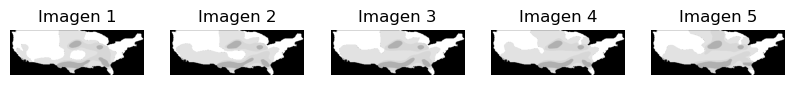

In [4]:
# Imprimir las primeras 5 imágenes
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(imagenes[i], cmap='gray')
    plt.title(f'Imagen {i+1}')
    plt.axis('off')
plt.show()

# Imprimir los primeros 5 arrays numpy correspondientes
#for i in range(5):
    #print(f"Array numpy {i+1}:\n{imagenes[i]}")

In [5]:
# Dividir el conjunto de datos en datos de entrenamiento y validación
X_train, X_val = train_test_split(imagenes, test_size=0.2, random_state=42)



In [6]:
# Construir el modelo del autoencoder
input_img = Input(shape=(122, 360, 1))

# Encoder
x = Conv2D(122, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(122, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Crear el modelo del encoder
encoder = Model(input_img, encoded)


In [8]:
# Entrenar el modelo
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(X_val, X_val))



Epoch 1/50
34/34 [==============================] - 13s 299ms/step - loss: 0.3511 - val_loss: 0.1893
Epoch 2/50
34/34 [==============================] - 8s 230ms/step - loss: 0.1742 - val_loss: 0.1723
Epoch 3/50
34/34 [==============================] - 8s 231ms/step - loss: 0.1687 - val_loss: 0.1678
Epoch 4/50
34/34 [==============================] - 8s 232ms/step - loss: 0.1660 - val_loss: 0.1657
Epoch 5/50
34/34 [==============================] - 8s 233ms/step - loss: 0.1638 - val_loss: 0.1630
Epoch 6/50
34/34 [==============================] - 8s 234ms/step - loss: 0.1606 - val_loss: 0.1604
Epoch 7/50
34/34 [==============================] - 8s 235ms/step - loss: 0.1601 - val_loss: 0.1609
Epoch 8/50
34/34 [==============================] - 8s 236ms/step - loss: 0.1577 - val_loss: 0.1573
Epoch 9/50
34/34 [==============================] - 8s 236ms/step - loss: 0.1555 - val_loss: 0.1554
Epoch 10/50
34/34 [==============================] - 8s 237ms/step - loss: 0.1540 - val_loss: 0.154

KeyboardInterrupt: 

In [14]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [15]:
tf.keras.utils.plot_model(autoencoder, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
# Obtener las imágenes reconstruidas
imagenes_reconstruidas = autoencoder.predict(X_val)
imagenes_codificadas = encoder.predict(X_val)

8/8 [==============================] - 0s 19ms/step


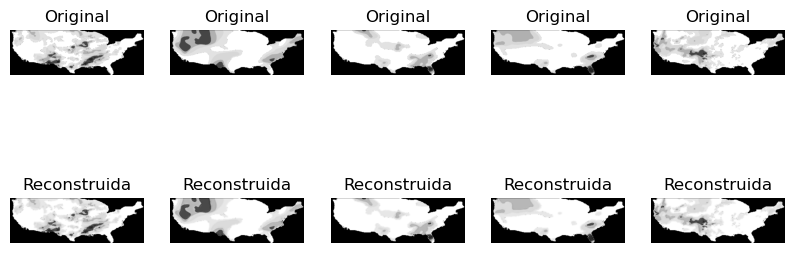

In [17]:
# Visualizar algunas imágenes originales y reconstruidas
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_val[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imagenes_reconstruidas[i], cmap='gray')
    plt.title('Reconstruida')
    plt.axis('off')
plt.show()

In [18]:
mse = np.mean((X_val - imagenes_reconstruidas)**2)

print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 0.0010445014


Imagen codificada 1: (61, 180, 122)
Imagen codificada 2: (61, 180, 122)
Imagen codificada 3: (61, 180, 122)
Imagen codificada 4: (61, 180, 122)
Imagen codificada 5: (61, 180, 122)


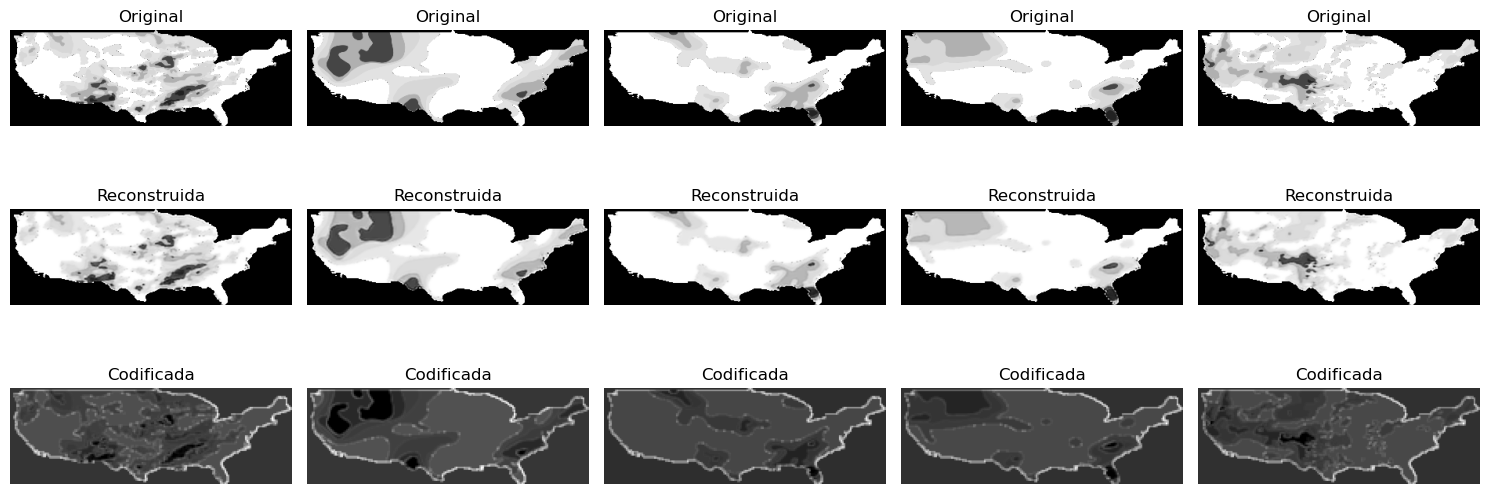

In [19]:

# Visualizar algunas imágenes originales, reconstruidas y codificadas
n = 5
plt.figure(figsize=(15, 6))
for i in range(n):
    # Imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_val[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Imagen reconstruida
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(imagenes_reconstruidas[i], cmap='gray')
    plt.title('Reconstruida')
    plt.axis('off')
  # Imagen codificada
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    forma_codificada = imagenes_codificadas[i].shape
    print(f"Imagen codificada {i+1}: {forma_codificada}")
    
    # Promediar los valores de los canales para obtener una imagen en escala de grises
    imagen_codificada_gris = np.mean(imagenes_codificadas[i], axis=-1)
    
    # Mostrar la imagen en escala de grises
    plt.imshow(imagen_codificada_gris, cmap='gray')
    plt.title('Codificada')
    plt.axis('off')

plt.tight_layout()
plt.show()